In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Carregamento da base de dados**: Utilizando a **função read** do panda, iremos ler e criar um DataFrame a partir do arquivo original. Neste arquivo em questão o delimitador não é uma vírgula (,) e sim o ponto e vírgulo (;), desta forma, precisamos indicar o delimitador correto por meio do parâmetro **sep.**

In [2]:
dados_gestantes = pd.read_csv('dadosgestantes.csv', sep=';')

In [3]:
#Tamanho do dataframe: linhas e colunas, respectivamente.
dados_gestantes.shape

(17, 5)

In [4]:
#Visão geral dos dados
dados_gestantes.head()

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas
0,A,45.0,26.0,3,Pre eclampsia e diabetes mellitus gestacional
1,B,38.0,28.0,3,Hipotireoidismo pre gestacional
2,C,29.0,34.0,0,"Diabetes mellitus gestacional, obesidade, hipo..."
3,D,37.0,34.0,0,Transtorno de ansiedade generalizada
4,E,23.0,36.0,0,Nao informado


Informações gerais sobre o dataframe:

In [5]:
dados_gestantes.tail()

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas
12,M,34.0,34.0,26,Nao informado
13,N,39.0,8.0,231,Nao informado
14,O,26.0,21.0,74,"Diabetes mellitus gestacional, obesidade e hip..."
15,P,NaN,NaN,53,Nao informado
16,Q,NaN,NaN,6,Nao informado


In [6]:
dados_gestantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Paciente                      17 non-null     object 
 1   Idade da gestante             15 non-null     float64
 2   Idade gestacional em semanas  15 non-null     float64
 3   dias entre infeccao e parto   17 non-null     int64  
 4   Condicoes medicas             17 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 812.0+ bytes


In [7]:
dados_gestantes.dtypes

Paciente                         object
Idade da gestante               float64
Idade gestacional em semanas    float64
dias entre infeccao e parto       int64
Condicoes medicas                object
dtype: object

Verificando valores ausentes no dataframe inteiro, podemos usar tanto a função **isna** quanto **isnull**.

In [8]:
dados_gestantes.isna().sum()

Paciente                        0
Idade da gestante               2
Idade gestacional em semanas    2
dias entre infeccao e parto     0
Condicoes medicas               0
dtype: int64

In [9]:
#verificando dados nulos em cada coluna
dados_gestantes.isnull().sum()

Paciente                        0
Idade da gestante               2
Idade gestacional em semanas    2
dias entre infeccao e parto     0
Condicoes medicas               0
dtype: int64

In [10]:
#verificando se há dados duplicados por meio da coluna: 'Paciente'
dados_gestantes['Paciente'].duplicated().sum()

0

In [11]:
dados_gestantes.describe()

,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto
count,15.000000,15.000000,17.000000
mean,30.533333,30.133333,35.823529
std,6.854265,7.799878,56.714455
min,22.000000,8.000000,0.000000
25%,26.000000,27.000000,3.000000
50%,29.000000,34.000000,12.000000
75%,35.500000,34.500000,46.000000
max,45.000000,38.000000,231.000000


**Filtrando:** Iremos verificar se cada valor na série 'Idade da gestante' está presente na lista [20, 25, 30]. Será retornado uma série booleana com True nas posições onde os valores da série 'Idade da gestante' correspondem a um dos valores da lista e False caso contrário. Ao final teremos uma série que contém todas as linhas onde a coluna 'Idade da gestante' possui um valor de 20, 25 ou 30 anos.

In [12]:
dados_gestantes[dados_gestantes['Idade da gestante'].isin([20,25,30])]

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas
10,K,30.0,30.0,46,"Pre eclampsia e diabetes mellitus gestacional,..."


In [13]:
dados_gestantes[dados_gestantes['Idade da gestante'].isin([20,25,30])].shape

(1, 5)

**Filtrando**, verificando se há uma paciente com idade igual à 30 e idade gestacional também igual à 30.

In [14]:
dados_gestantes[(dados_gestantes['Idade da gestante'] == 30) & (dados_gestantes['Idade gestacional em semanas'] == 30)]

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas
10,K,30.0,30.0,46,"Pre eclampsia e diabetes mellitus gestacional,..."


In [15]:
#Buscando os valores nulos da coluna 'idade da gestante':
dados_gestantes[dados_gestantes['Idade da gestante'].isnull()]

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas
15,P,NaN,NaN,53,Nao informado
16,Q,NaN,NaN,6,Nao informado


In [16]:
#Usamos o método fillna(30, inplace=True) para preencher os valores nulos na coluna com valor específico, neste caso, a média.
dados_gestantes['Idade da gestante'].fillna(30, inplace=True)

In [17]:
#Buscando novamente os valores nulos da coluna 'idade da gestante':
dados_gestantes[dados_gestantes['Idade da gestante'].isnull()]

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas


Outra forma de substituir os valores é por meio do método loc.   **dados_gestantes.loc[dados_gestantes['Idade da gestante'].isnull(), 'Idade da gestante'] = 30**. Neste caso o método Loc seleciona as linhas correspondentes onde a série booleana é True. Neste exemplo, a série booleana apresenta True nas posições onde os valores são nulos e False onde não são. Posteriormente,atribuimos o valor 30 às posições selecionadas pelas linhas e coluna especificadas, substituindo os valores nulos.

In [18]:
#Verificar a ocorrência de valores pela coluna 'dias entre infecção e parto' em ordem descrescente.
dados_gestantes.groupby('dias entre infeccao e parto').size().sort_values

<bound method Series.sort_values of dias entre infeccao e parto
0      4
3      2
4      1
6      1
12     1
26     1
33     1
42     1
46     1
53     1
74     1
76     1
231    1
dtype: int64>

**Agora utilizamos um filtro** para buscar todas as linhas que contenham paciente que apresentam Diabetes como condição médica subjacente. O **str.contains** é usado para verificar se cada elemento de uma série de strings contém um determinado padrão de texto. **case=False**, quando case é definido como False, a pesquisa é realizada de forma insensível a maiúsculas e minúsculas.

In [19]:
dados_gestantes[dados_gestantes['Condicoes medicas'].str.contains('diabetes', case=False)]

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas
0,A,45.0,26.0,3,Pre eclampsia e diabetes mellitus gestacional
2,C,29.0,34.0,0,"Diabetes mellitus gestacional, obesidade, hipo..."
5,F,28.0,25.0,76,Diabetes mellitus tipo 2
6,G,22.0,35.0,4,"Diabetes mellitus gestacional, obesidade e hip..."
10,K,30.0,30.0,46,"Pre eclampsia e diabetes mellitus gestacional,..."
11,L,27.0,37.0,12,Diabetes mellitus gestacional
14,O,26.0,21.0,74,"Diabetes mellitus gestacional, obesidade e hip..."


Também é possivel realizar um filtro com o método **startswith**. O método startswith retorna True se o valor começar com a string fornecida, caso contrário, retorna False. Desta forma, a expressão abaixo cria uma série booleana e o resultado dessa operação será uma série que conterá apenas as linhas do DataFrame original onde a coluna 'Condicoes medicas' começa com a string 'Dia'.

In [20]:
dados_gestantes[dados_gestantes['Condicoes medicas'].str.startswith('Dia')]

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas
2,C,29.0,34.0,0,"Diabetes mellitus gestacional, obesidade, hipo..."
5,F,28.0,25.0,76,Diabetes mellitus tipo 2
6,G,22.0,35.0,4,"Diabetes mellitus gestacional, obesidade e hip..."
11,L,27.0,37.0,12,Diabetes mellitus gestacional
14,O,26.0,21.0,74,"Diabetes mellitus gestacional, obesidade e hip..."


Podemos utilizar o **método replace** para substituir dados específicos, como no exemplo abaixo:

In [21]:
dados_gestantes['Condicoes medicas'] = dados_gestantes['Condicoes medicas'].str.replace('Nao informado', 'Sem dados')

In [22]:
dados_gestantes.head()

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas
0,A,45.0,26.0,3,Pre eclampsia e diabetes mellitus gestacional
1,B,38.0,28.0,3,Hipotireoidismo pre gestacional
2,C,29.0,34.0,0,"Diabetes mellitus gestacional, obesidade, hipo..."
3,D,37.0,34.0,0,Transtorno de ansiedade generalizada
4,E,23.0,36.0,0,Sem dados


Agora queremos dividir(**transformar os dados**) cada patologia da coluna Condições médicas, perceba que cada patologia é divida por **,** ou **e**. Para isto utilizamos o método **split**, ele divide uma string em pedaços com base em um separador especificado, **neste caso , ou(|) e**. Já o **expand=True:**, é usado para indicar que desejamos que o resultado seja expandido em colunas separadas.

In [23]:
dados_gestantes['Condicoes medicas'].str.split(',| e ', expand=True).head(10)

,0,1,2,3,4
0,Pre eclampsia,diabetes mellitus gestacional,None,None,None
1,Hipotireoidismo pre gestacional,None,None,None,None
2,Diabetes mellitus gestacional,obesidade,hipotireoidismo,ex usuaria de substancia psicoativa,historico de sifilis devidamente tratada
3,Transtorno de ansiedade generalizada,None,None,None,None
4,Sem dados,None,None,None,None
5,Diabetes mellitus tipo 2,None,None,None,None
6,Diabetes mellitus gestacional,obesidade,hipotireoidismo,None,None
7,Toxoplasmose aguda,hipotireoidismo,None,None,None
8,Asma,transtorno de ansiedade generalizada,obesidade,None,None
9,Sem dados,None,None,None,None


Apos realizar a transformação dos dados, podemos gravar a patologia descrita na posição 0 em uma nova coluna, isto é bastante útil quando queremos realizar operações com cada dado separadamente. O **str[0]**  é usado para acessar o primeiro elemento de da lista resultante que em seguida é atribuído a coluna 'Primeira patologia'. Esta técnica é chamada de **Split de strings**, uma técnica comum na **engenharia de atributos (feature engineering)** que pode ser usada para criar novos recursos ou características úteis para análise de dados.

In [24]:
dados_gestantes['Primeira patologia'] = dados_gestantes['Condicoes medicas'].str.split(',| e ').str[0]

In [25]:
dados_gestantes.head()

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas,Primeira patologia
0,A,45.0,26.0,3,Pre eclampsia e diabetes mellitus gestacional,Pre eclampsia
1,B,38.0,28.0,3,Hipotireoidismo pre gestacional,Hipotireoidismo pre gestacional
2,C,29.0,34.0,0,"Diabetes mellitus gestacional, obesidade, hipo...",Diabetes mellitus gestacional
3,D,37.0,34.0,0,Transtorno de ansiedade generalizada,Transtorno de ansiedade generalizada
4,E,23.0,36.0,0,Sem dados,Sem dados


Agora queremos criar um **Histograma em relação ao intervalo entre a infecção e o parto(dias)**   Explicando o código: **np.histogram():**   Essa função é parte da biblioteca NumPy (np) e é usada para calcular a distribuição de frequência dos dados passados para ela. Ela retorna dois valores: o primeiro valor é uma array contendo a contagem de elementos em cada intervalo (ou bin) e o segundo valor é um array contendo as bordas dos bins (os pontos de corte dos intervalos). **['dias entre infeccao e parto']** está selecionando todas as linhas desta coluna, **bins = 7:** Nesse caso, o parâmetro bins é utilizado para especificar o número de intervalos que desejamos na distribuição de frequência. O valor 7 indica que o histograma será dividido em 7 intervalos.

Podemos também combinar strings, **o método cat** é usado para concatenar strings, neste caso para teste vamos utilizar a coluna 'Paciente' e 'Primeira patologia', o resultado será armazenado em um nova coluna e o separador das informações será o hífen(-).

In [26]:
dados_gestantes['Historico clinico']=dados_gestantes['Paciente'].str.cat(dados_gestantes['Primeira patologia'], sep = ' - ')

In [27]:
dados_gestantes.head()

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas,Primeira patologia,Historico clinico
0,A,45.0,26.0,3,Pre eclampsia e diabetes mellitus gestacional,Pre eclampsia,A - Pre eclampsia
1,B,38.0,28.0,3,Hipotireoidismo pre gestacional,Hipotireoidismo pre gestacional,B - Hipotireoidismo pre gestacional
2,C,29.0,34.0,0,"Diabetes mellitus gestacional, obesidade, hipo...",Diabetes mellitus gestacional,C - Diabetes mellitus gestacional
3,D,37.0,34.0,0,Transtorno de ansiedade generalizada,Transtorno de ansiedade generalizada,D - Transtorno de ansiedade generalizada
4,E,23.0,36.0,0,Sem dados,Sem dados,E - Sem dados


In [28]:
histograma= np.histogram(dados_gestantes['dias entre infeccao e parto'], bins = 7)
histograma

(array([10,  4,  2,  0,  0,  0,  1], dtype=int64),
 array([  0.,  33.,  66.,  99., 132., 165., 198., 231.]))

Perceba que o **primeiro array** representa a contagem de elementos em cada intervalo. O primeiro valor, 10, indica que há 10 elementos no intervalo de 0 a 33, o segundo valor, 4, indica que há 2 elementos no intervalo de 33 a 66, e assim por diante.
**A segunda array** representa as bordas dos bins (pontos de corte dos intervalos).

**É possível percerber que há tres intervalos que ficaram com a contagem de elementos igual a zero**. Um histograma com intervalo de contagem zerada pode levar a interpretações errôneas dos dados e fornecer uma representação distorcida da distribuição dos valores. Existem várias abordagens comuns para ajudar a escolher o número de bins de um histograma: **Regra de Freedman-Diaconis:** A regra é baseada na amplitude interquartil dos dados (a diferença entre o terceiro quartil e o primeiro quartil) e o tamanho do conjunto de dados. A fórmula para calcular o número de bins é: **bins = 2 * (IQR) / (n^(1/3))** IQR: Amplitude interquartil (terceiro quartil - primeiro quartil).n: Número de observações no conjunto de dados.

In [29]:
# Calculando o primeiro quartil (Q1)
q1 = dados_gestantes['dias entre infeccao e parto'].quantile(0.25)

# Calculando o terceiro quartil (Q3)
q3 = dados_gestantes['dias entre infeccao e parto'].quantile(0.75)

# Calcular a amplitude interquartil (IQR)
iqr = q3 - q1
iqr

43.0

In [30]:
# Calcular o número de dados (n)
n = len(dados_gestantes['dias entre infeccao e parto'])

# Calcular o número de bins
bins = 2 * iqr / (n**(1/3))
bins

33.44635621102255

In [31]:
histograma= np.histogram(dados_gestantes['dias entre infeccao e parto'], bins = 33)
histograma

(array([8, 1, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([  0.,   7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.,  70.,
         77.,  84.,  91.,  98., 105., 112., 119., 126., 133., 140., 147.,
        154., 161., 168., 175., 182., 189., 196., 203., 210., 217., 224.,
        231.]))

Notoriamente o histograma ainda não representa uma frequencia de distribuição ideal, um outro método para calcular o número de bins é **Regra de Sturges:** Essa regra é simples e amplamente utilizada, mas pode não ser a melhor escolha para conjuntos de dados muito grandes ou com distribuições complexas. A regra sugere que o número de bins seja igual a **1 + log2(n)**, onde n é o número de observações no conjunto de dados.

In [32]:
#Calculo pela Regra de Sturges, para usar log na base 2 é necessário importar a biblioteca math:

import math
bins_1 = 1 + math.log2(n)
bins_1

5.087462841250339

In [33]:
histograma= np.histogram(dados_gestantes['dias entre infeccao e parto'], bins = 5)
histograma

(array([13,  3,  0,  0,  1], dtype=int64),
 array([  0. ,  46.2,  92.4, 138.6, 184.8, 231. ]))

Verificamos novamente que ainda há intervalos com contagem igual a zero, podemos realizar uma tratativa dos dados por meio da **eliminação dos outliers**. Uma forma de identificar valores discrepantes é aplicando novamente a **amplitude interquartil**

In [34]:
q1 = dados_gestantes['dias entre infeccao e parto'].quantile(0.25)
q3 = dados_gestantes['dias entre infeccao e parto'].quantile(0.75)
iqr = q3 - q1

# Calcula os limites para identificação de outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
print (limite_inferior)
print (limite_superior)

# Identifica os outliers por meio de uma List comprehension, irá retornar x para cada valor de x dentro da variável amplitude
#que ultrapasse o limite inferior ou superior.
outliers = [x for x in dados_gestantes['dias entre infeccao e parto'] if x < limite_inferior or x > limite_superior]
outliers

-61.5
110.5


[231]

Como a medição do único outlier é legítima, podemos optar por subistituir este valor  ao invés de simplesmente removê-lo. Por meio da biblioteca statistics podemos verificar a média e a mediana dos valores.

In [35]:
import statistics

# Calcula a média
media = statistics.mean(dados_gestantes['dias entre infeccao e parto'])

# Calcula a mediana
mediana = statistics.median(dados_gestantes['dias entre infeccao e parto'])

print("Média:", media)
print("Mediana:", mediana)

Média: 35.8235294117647
Mediana: 12


Como a média sofre grande influência dos valores discrepantes, iremos substituir o outlier pela mediana.

In [36]:
# Substitui os outliers pela mediana usando loc
dados_gestantes.loc[(dados_gestantes['dias entre infeccao e parto'] < limite_inferior) | 
                    (dados_gestantes['dias entre infeccao e parto'] > limite_superior), 'dias entre infeccao e parto'] = mediana

In [37]:
#verificamos se ainda existem valores discrepantes
#Usamos o @ para identificar que limite_inferior e limite_superior são variáveis e não strings.
dados_gestantes.query('`dias entre infeccao e parto` < @limite_inferior or `dias entre infeccao e parto` > @limite_superior')

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas,Primeira patologia,Historico clinico


In [38]:
#Agora podemos criar um histograma com base na Regra de Sturges
histograma= np.histogram(dados_gestantes['dias entre infeccao e parto'], bins = 5)
histograma

(array([10,  1,  2,  2,  2], dtype=int64),
 array([ 0. , 15.2, 30.4, 45.6, 60.8, 76. ]))

Text(0.5, 0, 'Dias entre a infecção e o parto')

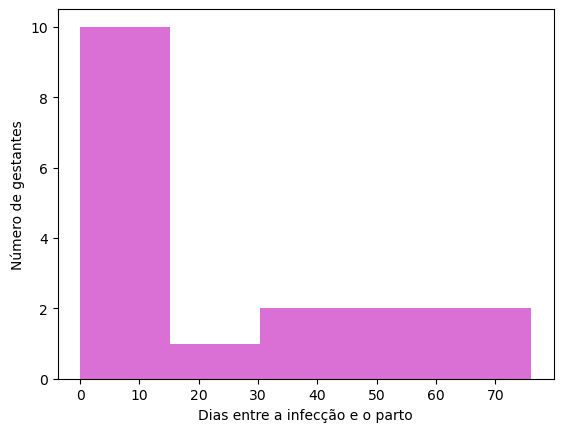

In [39]:
#Histograma corrigido
plt.hist(dados_gestantes['dias entre infeccao e parto'], bins = 5, color= 'orchid')
plt.ylabel('Número de gestantes')
plt.xlabel('Dias entre a infecção e o parto')

Como podemos perceber temos a representação de um **histograma enviesado para direita**, também conhecido como assimétrico à direita ou positivamente enviesado. Essa assimetria indica que existem valores extremamente altos que puxam a média para a direita. **Uma característica comum das distribuições enviesadas para a direita é que a média é maior do que a mediana** (Média: 35.8,
Mediana: 12), uma vez que a média é mais influenciada pelos valores maiores na extremidade direita. Notoriamente, a concentração dos dados está dentro do intervalo de 0 à 15. 

Por meio da biblioteca seaborn podemos traçar um gráfico KDE, **gráfico de densidade kernel**. O KDE é uma forma suavizada de representar a distribuição de dados em um gráfico, semelhante a um histograma, mas com uma aparência mais suave e contínua.  A linha de densidade em um gráfico KDE é um recurso importante para visualizar a **distribuição dos dados**. Ela representa uma estimativa suave da densidade de probabilidade dos dados, ou seja, mostra como os valores estão distribuídos ao longo do eixo horizontal. **Desta forma, podemos identificar a forma da distribuição dos dados**, demonstrando se os dados têm uma distribuição simétrica (forma de sino), assimétrica (à esquerda ou à direita) ou bimodal (com dois picos distintos), o que pode ser útil para entender o comportamento dos dados.

<Axes: xlabel='dias entre infeccao e parto', ylabel='Density'>

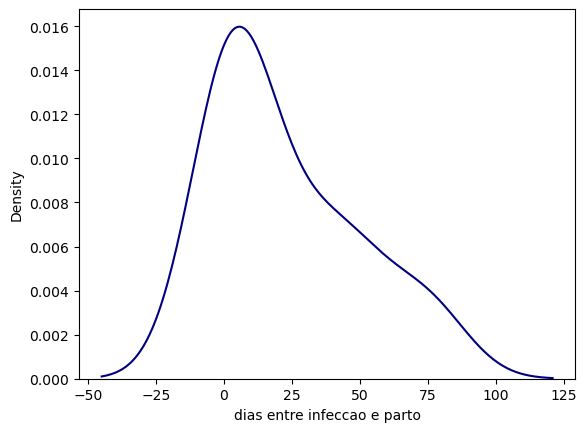

In [40]:
#traçando o gráfico de densidade
sns.kdeplot(dados_gestantes['dias entre infeccao e parto'], color= 'navy')

É possível visualizar que foi gerado um intervalo com uma **distribuição dos dados de forma mais "normal" ou simétrica**, a  Seaborn faz este ajuste especialmente se houver uma grande quantidade de dados em torno de um ponto central. Neste caso, foi escolhido automaticamente um intervalo maior do que o intervalo original dos dados para representar a distribuição com mais precisão. Ao escolher um intervalo maior do que o intervalo original dos dados, o gráfico KDE garante que a estimativa de densidade abrange uma ampla faixa de valores, o que ajuda a revelar informações sobre a forma geral da distribuição e evita que o gráfico pareça limitado por falta de dados além dos limites originais.  O gráfico KDE está fornecendo uma estimativa suave da distribuição dos dados observados. Essa estimativa é útil para visualizar padrões e características da distribuição, mas não implica que a distribuição estimada seja a distribuição real que gerou os dados.

Podemos também gerar um **diagrama de caixa** com os dados sa série **'Idade gestacional em semanas'** demonstrando visualmente a distribuição dos dados desta coluna. Para isto, primeiramente, precisamos tratar os valores nulos presentes nesta série. 

In [41]:
dados_gestantes[dados_gestantes['Idade gestacional em semanas'].isnull()]

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas,Primeira patologia,Historico clinico
15,P,30.0,NaN,53,Sem dados,Sem dados,P - Sem dados
16,Q,30.0,NaN,6,Sem dados,Sem dados,Q - Sem dados


**Como há valores nulos, iremos utilizar a biblioteca Pandas** ao invés da biblioteca statistics, a biblioteca Pandas ignora os valores nulos. O método **dropna()** é usado para remover os valores nulos da coluna antes do calculo da média e mediana. Há a possibilidade também de utilizar a biblioteca Statistics, sendo necessário aplicar  um filtro: idade_gestacional = dados_gestantes['Idade gestacional em semanas'].dropna().

In [42]:
mediana_idadeg = dados_gestantes['Idade gestacional em semanas'].dropna().median()
media_idadeg = dados_gestantes['Idade gestacional em semanas'].dropna().mean()

print(mediana_idadeg)
print(media_idadeg)

34.0
30.133333333333333


Poderiamos optar por substituir os valores nulos pela mediana, mas **quando analisamos individualmente cada dado**, verificamos que os valores faltantes são de pacientes que tiveram um intervalo maior entre a infecção e o parto, desta forma, a média pode ser mais representativa neste caso específico. Usamos o **método .fillna** para preencher os valores ausentes. Neste caso, todos os valores NaN(Not a Number) na coluna 'Idade gestacional em semanas' serão substituídos pelo valor 'media_idadeg'. **inplace=True**: É um parâmetro opcional, quando inplace=True é usado, as alterações são aplicadas diretamente ao DataFrame original, em vez de criar uma cópia modificada. 

In [43]:
dados_gestantes['Idade gestacional em semanas'].fillna(media_idadeg, inplace=True)

In [44]:
dados_gestantes.tail()

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas,Primeira patologia,Historico clinico
12,M,34.0,34.000000,26,Sem dados,Sem dados,M - Sem dados
13,N,39.0,8.000000,12,Sem dados,Sem dados,N - Sem dados
14,O,26.0,21.000000,74,"Diabetes mellitus gestacional, obesidade e hip...",Diabetes mellitus gestacional,O - Diabetes mellitus gestacional
15,P,30.0,30.133333,53,Sem dados,Sem dados,P - Sem dados
16,Q,30.0,30.133333,6,Sem dados,Sem dados,Q - Sem dados


Também podemos traçar um **gráfico de setores** para idade gestacional das pacientes, podemos agrupar as pacientes com base em idade gestacional por trimestre, **sendo o 1º trimestre gestacional até 13 semanas, 2º trimestre de 14 semanas até 26 semanas e o 3º trimestre à partir de 27 semanas.**

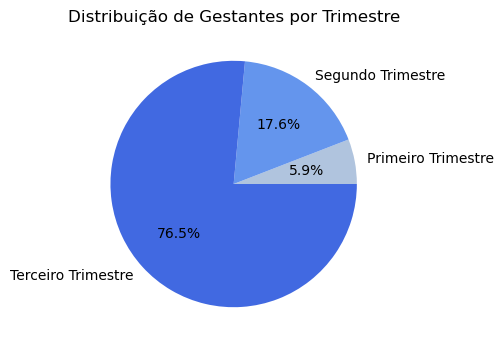

In [45]:
#Definindo cada variável
primeiro_trimestre = dados_gestantes.query('`Idade gestacional em semanas` <= 13')
segundo_trimestre = dados_gestantes.query('`Idade gestacional em semanas` > 13 and `Idade gestacional em semanas` <= 26')
terceiro_trimestre = dados_gestantes.query('`Idade gestacional em semanas` > 26')

# Dados de contagem por trimestre,shape[0] retorna a contagem de gestantes em cada um dos trimestres separados nos DataFrames
contagem_por_trimestre = [primeiro_trimestre.shape[0], segundo_trimestre.shape[0], terceiro_trimestre.shape[0]]
trimestres = ['Primeiro Trimestre', 'Segundo Trimestre', 'Terceiro Trimestre']

# Criando o gráfico de pizza
plt.figure(figsize=(6, 4))
plt.pie(contagem_por_trimestre, labels=trimestres, autopct='%1.1f%%', colors=['lightsteelblue','cornflowerblue', 'royalblue'])
plt.title('Distribuição de Gestantes por Trimestre')
plt.show()

**Diagrama de caixa**, a maior parte do código se refere a estrutura de cores do boxplot. Caso optassemos por um diagrama de caixa padrão, apenas o código **plt.boxplot(dados_gestantes['Idade gestacional em semanas'])** era necessário, sendo traçado um diagrama padrão na posição vertical.

Text(0.5, 0, 'Idade Gestacional (semanas)')

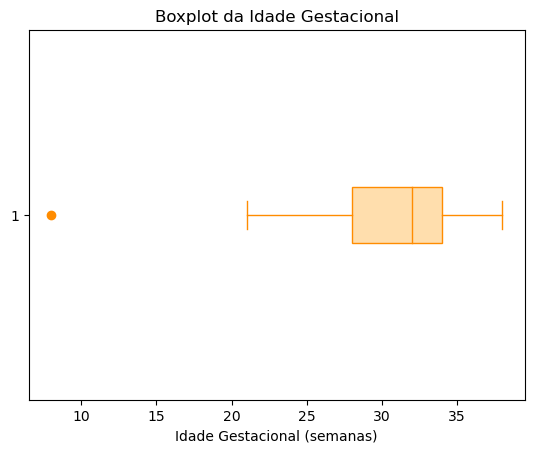

In [46]:
plt.boxplot(dados_gestantes['Idade gestacional em semanas'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor= 'navajowhite', edgecolor='darkorange'), medianprops=dict(color='darkorange'), 
            flierprops=dict(markerfacecolor='darkorange', markeredgecolor='darkorange'),whiskerprops=dict(color='darkorange'), 
            capprops=dict(color='darkorange'))
plt.title('Boxplot da Idade Gestacional')
plt.xlabel('Idade Gestacional (semanas)')

Após verificar a distribuição de gestantes por trimestres, também iremos tratar os outliers presentes na coluna 'Idade gestacional', não o fizemos anteriormente porque o tratamento iria interferir no construção de um gráfico de setores mais fidedigno. 

In [47]:
q1 = dados_gestantes['Idade gestacional em semanas'].quantile(0.25)
q3 = dados_gestantes['Idade gestacional em semanas'].quantile(0.75)
iqr = q3 - q1

# Calcula os limites para identificação de outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
    
print (limite_inferior)
print (limite_superior)

# Identifica os outliers por meio de uma List comprehension, irá retornar x para cada valor de x dentro da variável amplitude
#que ultrapasse o limite inferior ou superior.
outliers = [x for x in dados_gestantes['Idade gestacional em semanas'] if x < limite_inferior or x > limite_superior]
outliers

19.0
43.0


[8.0]

In [48]:
dados_gestantes['Idade gestacional em semanas'].describe()

count    17.000000
mean     30.133333
std       7.296118
min       8.000000
25%      28.000000
50%      32.000000
75%      34.000000
max      38.000000
Name: Idade gestacional em semanas, dtype: float64

In [49]:
# Substitui os outliers pela mediana usando loc
dados_gestantes.loc[(dados_gestantes['Idade gestacional em semanas'] < limite_inferior) | 
                    (dados_gestantes['Idade gestacional em semanas'] > limite_superior), 'Idade gestacional em semanas'] = 32

In [50]:
#verificamos se ainda existem valores discrepantes
#Usamos o @ para identificar que limite_inferior e limite_superior são variáveis e não strings.
dados_gestantes.query('`Idade gestacional em semanas` < @limite_inferior or `Idade gestacional em semanas` > @limite_superior')

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas,Primeira patologia,Historico clinico


**Agregação múltiplica com groupby:** Iremos selecionar um subconjunto das colunas do DataFrame dados_gestantes. Os nomes das colunas selecionadas são 'Idade da gestante', 'Idade gestacional em semanas' e 'dias entre infeccao e parto'. O resultado é um novo DataFrame que contém apenas essas colunas. Em seguida utilizaremos **o método groupby** para agrupar o DataFrame pelo valores únicos nas colunas 'Idade da gestante' e 'Idade gestacional em semanas'.  Em seguida é aplicado **a função agg** (agregação), sendo especificado três funções de agregação: mean (média), std (desvio padrão) e count (contagem). Isso significa que para cada grupo formado pelas combinações únicas de 'Idade da gestante' e 'Idade gestacional em semanas', **será calculado a média, o desvio padrão e a contagem dos valores na coluna 'dias entre infeccao e parto'**. Como a maioria dos valores são únicos, não teremos essas medidas para todo o conjunto, assim o código foi escolhido para treino. 

In [51]:
dados_gestantes[['Idade da gestante', 'Idade gestacional em semanas', 'dias entre infeccao e parto']].groupby([
    'Idade da gestante', 'Idade gestacional em semanas']).agg(['mean', 'std', 'count'])

dias entre infeccao e parto  \
                                                                      mean   
Idade da gestante Idade gestacional em semanas                               
22.0              34.000000                                           33.0   
                  35.000000                                            4.0   
23.0              36.000000                                            0.0   
26.0              21.000000                                           74.0   
                  32.000000                                           42.0   
27.0              37.000000                                           12.0   
28.0              25.000000                                           76.0   
29.0              34.000000                                            0.0   
30.0              30.000000                                           46.0   
                  30.133333                                           29.5   
32.0              38.000000                                            0.0   
34.0              34.000000                                           26.0   
37.0              34.000000                                            0.0   
38.0              28.000000                                            3.0   
39.0              32.000000                                           12.0   
45.0              26.000000                                            3.0   

                                                                 
                                                      std count  
Idade da gestante Idade gestacional em semanas                   
22.0              34.000000                           NaN     1  
                  35.000000                           NaN     1  
23.0              36.000000                           NaN     1  
26.0              21.000000                           NaN     1  
                  32.000000                           NaN     1  
27.0              37.000000                           NaN     1  
28.0              25.000000                           NaN     1  
29.0              34.000000                           NaN     1  
30.0              30.000000                           NaN     1  
                  30.133333                     33.234019     2  
32.0              38.000000                           NaN     1  
34.0              34.000000                           NaN     1  
37.0              34.000000                           NaN     1  
38.0              28.000000                           NaN     1  
39.0              32.000000                           NaN     1  
45.0              26.000000                           NaN     1

**Há uma correlação negativa  moderada entre a idade gestacional e o período entre o diagnóstico da infecção e o momento do parto. A maioria dos dados indica, portanto, que o diagnóstico ocorreu ao final da gestação, com diferença de poucos dias para o parto. Há uma correlação fraca entre a idade da gestante e a idade gestacional e o período entre o diagnóstico da infecção e o momento do parto. O método corr utiliza o coeficiente de correlação de Pearson.**

In [52]:
# Utilizando o método corr () para calcular a matriz de correlação para todas as colunas numéricas. 
dados_gestantes.corr(numeric_only=True)

,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto
Idade da gestante,1.000000,-0.238414,-0.314417
Idade gestacional em semanas,-0.238414,1.000000,-0.630728
dias entre infeccao e parto,-0.314417,-0.630728,1.000000


A matriz de correlação é uma matriz quadrada em que os elementos da diagonal principal sempre têm um valor de 1. Isso acontece porque a diagonal principal representa a correlação de cada variável consigo mesma, o que é sempre perfeito (correlação de 100%) - uma variável é sempre perfeitamente correlacionada com ela mesma.

<Axes: xlabel='dias entre infeccao e parto', ylabel='Idade gestacional em semanas'>

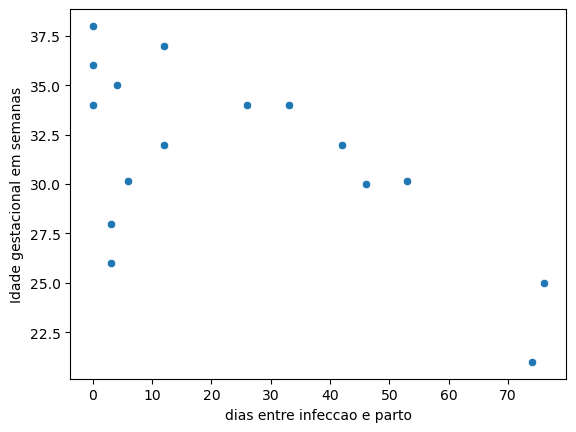

In [53]:
# Vamos analisar a relação entre a variável de entrada 'dias entre infecção e parto' e a variável alvo 'Idades gestacional'. 
sns.scatterplot(data = dados_gestantes, x = 'dias entre infeccao e parto', y = 'Idade gestacional em semanas')

## Conceitos

A **Regressão Linear** é uma técnica estatística utilizada para modelar a relação entre uma variável dependente (também chamada de variável resposta ou variável alvo) e uma ou mais variáveis independentes (também chamadas de variáveis explicativas ou preditoras).

A Regressão Linear tem como objetivo estimar os coeficientes da equação que melhor descreve essa relação, minimizando a soma dos erros quadráticos entre os valores observados e os valores previstos pelo modelo.  

O modelo de regressão linear simples é representado pela equação:

**Y = β0 + β1*X  + ε.**  
**Y** - é a variável dependente.  
**X** -  é a variável independente.  
**β0** -  é o coeficiente linear, ponto que corta o eixo y (intercepto).  
**β1** - é o coeficiente associado a X (a inclinação)  
**ε** - é o erro aleatório.  
**β1** também pode ser entendido como  a taxa de variação de Y dependente de X, ou seja, o quanto a variável dependente (Y) muda em resposta a uma unidade de mudança na variável independente (X).
Estes termos se relacionam de forma indireta com a trigonometria, **assim B1 também pode ser definida como a tangente do ângulo α (alfa)**, uma vez que, a tangente do ângulo alfa é a razão entre o comprimento do cateto oposto e o comprimento do cateto adjacente. 

#### Abaixo está uma figura representativa destes conceitos

![Reta](regressao_linear.jpg)


### Modelo de Regressão Linear utilizando o método de Mínimos Quadrados Ordinários (OLS - Ordinary Least Squares) com a biblioteca Statsmodels em Python

In [54]:
dados_gestantes

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas,Primeira patologia,Historico clinico
0,A,45.0,26.000000,3,Pre eclampsia e diabetes mellitus gestacional,Pre eclampsia,A - Pre eclampsia
1,B,38.0,28.000000,3,Hipotireoidismo pre gestacional,Hipotireoidismo pre gestacional,B - Hipotireoidismo pre gestacional
2,C,29.0,34.000000,0,"Diabetes mellitus gestacional, obesidade, hipo...",Diabetes mellitus gestacional,C - Diabetes mellitus gestacional
3,D,37.0,34.000000,0,Transtorno de ansiedade generalizada,Transtorno de ansiedade generalizada,D - Transtorno de ansiedade generalizada
4,E,23.0,36.000000,0,Sem dados,Sem dados,E - Sem dados
5,F,28.0,25.000000,76,Diabetes mellitus tipo 2,Diabetes mellitus tipo 2,F - Diabetes mellitus tipo 2
6,G,22.0,35.000000,4,"Diabetes mellitus gestacional, obesidade e hip...",Diabetes mellitus gestacional,G - Diabetes mellitus gestacional
7,H,26.0,32.000000,42,Toxoplasmose aguda e hipotireoidismo,Toxoplasmose aguda,H - Toxoplasmose aguda
8,I,22.0,34.000000,33,"Asma, transtorno de ansiedade generalizada e o...",Asma,I - Asma
9,J,32.0,38.000000,0,Sem dados,Sem dados,J - Sem dados


In [55]:
# Definimos a variável dependente e indepedente
y = dados_gestantes['Idade gestacional em semanas']
X = dados_gestantes['dias entre infeccao e parto']
X

0      3
1      3
2      0
3      0
4      0
5     76
6      4
7     42
8     33
9      0
10    46
11    12
12    26
13    12
14    74
15    53
16     6
Name: dias entre infeccao e parto, dtype: int64

In [56]:
# O Statsmodels requer a adição de uma constante à variável independente
X= sm.add_constant(X)
X

,const,dias entre infeccao e parto
0,1.0,3
1,1.0,3
2,1.0,0
3,1.0,0
4,1.0,0
5,1.0,76
6,1.0,4
7,1.0,42
8,1.0,33
9,1.0,0


In [57]:
# Criamos o modelo
modelo = sm.OLS(y, X)

O **método sm.OLS(y, X)** é uma função do pacote Statsmodels, biblioteca Python utilizada para análise estatística. A função OLS (Ordinary Least Squares) é usada para ajustar um modelo de regressão linear, minimizando a soma dos erros quadráticos entre os valores observados e os valores previstos pelo modelo.  
A função sm.OLS(y, X) recebe dois argumentos principais:  
y: Um array ou pandas Series representando a variável dependente (variável resposta ou alvo). É a variável que você deseja prever ou explicar com base nas variáveis independentes.  
X: Um array ou pandas DataFrame representando as variáveis independentes (variáveis explicativas ou preditoras). São as variáveis que você deseja usar para explicar ou prever a variável dependente.

In [58]:
# Treinamento do modelo
resultado = modelo.fit()

In [59]:
print(resultado.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Idade gestacional em semanas   R-squared:                       0.398
Model:                                      OLS   Adj. R-squared:                  0.358
Method:                           Least Squares   F-statistic:                     9.909
Date:                          Wed, 13 Sep 2023   Prob (F-statistic):            0.00663
Time:                                  17:50:04   Log-Likelihood:                -45.058
No. Observations:                            17   AIC:                             94.12
Df Residuals:                                15   BIC:                             95.78
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------

C:\Users\Leticia\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


A mensagem de aviso **"kurtosistest only valid for n>=20 ... continuing anyway, n=17"** é emitida pelo Statsmodels para informar que um dos testes estatísticos realizados no resumo do modelo (possivelmente o teste de curtose) pode não ser válido devido ao tamanho da amostra pequena (n=17) no seu conjunto de dados.

## Interpretando o Resultado do Modelo Estatístico com Statsmodels

A tabela acima traz um resumo do modelo com diversas estatísticas. Aqui faremos a análise de uma delas, o R².

O coeficiente de determinação, também conhecido como R², é uma medida estatística que avalia o quão bem o modelo de regressão se ajusta aos dados observados. Ele varia de 0 a 1 e representa a proporção da variação total da variável dependente que é explicada pelo modelo de regressão.

A interpretação do R² é a seguinte:

R² = 0: Neste caso, o modelo de regressão não explica nenhuma variação na variável dependente. Isso significa que o modelo não é útil para prever ou explicar a variável de interesse.

R² = 1: Neste caso, o modelo de regressão explica toda a variação na variável dependente. Isso indica que o modelo se ajusta perfeitamente aos dados e é extremamente útil para prever ou explicar a variável de interesse.

0 < R² < 1: Neste caso, o modelo de regressão explica uma parte da variação na variável dependente. Quanto maior o valor de R², melhor o modelo se ajusta aos dados e melhor é a sua capacidade de prever ou explicar a variável de interesse.

É importante notar que um R² alto não garante que o modelo seja adequado, nem que haja uma relação causal entre as variáveis.  Portanto, é essencial avaliar outras estatísticas e diagnosticar o modelo antes de tirar conclusões definitivas.

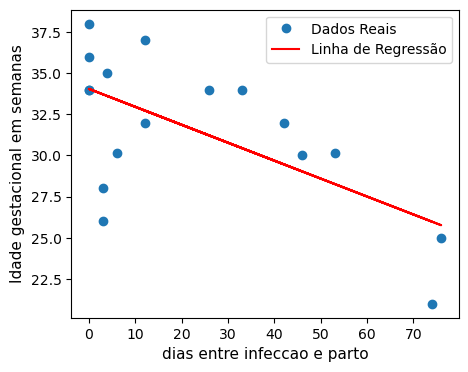

In [60]:
# Plot
plt.figure(figsize=(5, 4)) #cria uma nova figura de plotagem com uma largura de 7 unidades e uma altura de 4 unidades
plt.xlabel('dias entre infeccao e parto', size=11) #Define o rótulo do eixo x; ajusta o tamanho da fonte para 11. 
plt.ylabel('Idade gestacional em semanas', size=11)#Define o rótulo do eixo y; ajusta o tamanho da fonte para 11. 

#Plota os dados reais no gráfico: X representa os valores da variável independente e y os valores da variável dependente.
plt.plot(X['dias entre infeccao e parto'], y, 'o', label='Dados Reais')

#X é usado como o eixo x e resultado.fittedvalues é a saída do modelo de regressão, a previsão do modelo.
#O argumento 'r-' especifica que a linha deve ser desenhada em vermelho contínuo
plt.plot(X['dias entre infeccao e parto'], resultado.fittedvalues, 'r-', label= 'Linha de Regressão')

#Adiciona uma legenda ao gráfico com base nos rótulos. 
#O argumento loc='best' indica que a biblioteca deve escolher automaticamente a melhor posição para a legenda no gráfico.
plt.legend(loc='best')
plt.show()

### Modelo de Regressão Linear utilizando biblioteca Scikit-Learn em Python

In [61]:
dados_gestantes.head()

,Paciente,Idade da gestante,Idade gestacional em semanas,dias entre infeccao e parto,Condicoes medicas,Primeira patologia,Historico clinico
0,A,45.0,26.0,3,Pre eclampsia e diabetes mellitus gestacional,Pre eclampsia,A - Pre eclampsia
1,B,38.0,28.0,3,Hipotireoidismo pre gestacional,Hipotireoidismo pre gestacional,B - Hipotireoidismo pre gestacional
2,C,29.0,34.0,0,"Diabetes mellitus gestacional, obesidade, hipo...",Diabetes mellitus gestacional,C - Diabetes mellitus gestacional
3,D,37.0,34.0,0,Transtorno de ansiedade generalizada,Transtorno de ansiedade generalizada,D - Transtorno de ansiedade generalizada
4,E,23.0,36.0,0,Sem dados,Sem dados,E - Sem dados


In [62]:
#Extração dos valores das colunas de interesse e armazenamento na variável indepedente e dependente, respectivamente:
#.values é um atributo do Pandas que converte a série (coluna) de dados em uma matriz NumPy, um array unidimensional.
X = dados_gestantes['dias entre infeccao e parto'].values
y = dados_gestantes['Idade gestacional em semanas'].values
X

array([ 3,  3,  0,  0,  0, 76,  4, 42, 33,  0, 46, 12, 26, 12, 74, 53,  6],
      dtype=int64)

Também poderia ser utilizado o código **X = np.array(dados_gestantes['dias entre infeccao e parto'])** para converter a coluna 'dias entre infeccao e parto' do DataFrame dados_gestantes em um objeto NumPy array. 

In [63]:
type(X)

numpy.ndarray

In [64]:
#Utilizando a função np.corrcoef da biblioteca NumPy para calcular a matriz de correlação entre duas variáveis, X e y. 
correlacao = np.corrcoef(X, y)
correlacao

array([[ 1.       , -0.6307278],
       [-0.6307278,  1.       ]])

O código X = X.reshape(-1, 1) está remodelando o array unidimensional X em uma matriz bidimensional, onde cada valor original de X é uma entrada na nova matriz. Isso é comum quando se prepara os dados para modelos de aprendizado de máquina, como regressão linear. O **valor -1**, indica que você quer que o NumPy calcule automaticamente o tamanho da primeira dimensão (número de linhas) para você, com base no tamanho total dos dados. Isso é útil quando você deseja manter o mesmo número total de elementos, mas deseja alterar a forma do array de uma dimensão para duas dimensões (matriz). **O valor 1,** define a segunda dimensão do array, que é o número de colunas. Neste caso, estamos criando uma matriz com uma única coluna. Desta forma, **o padrão -1, 1** é comumente usado para converter um array unidimensional em uma matriz bidimensional

In [65]:
X = X.reshape(-1, 1)
print (X)

[[ 3]
 [ 3]
 [ 0]
 [ 0]
 [ 0]
 [76]
 [ 4]
 [42]
 [33]
 [ 0]
 [46]
 [12]
 [26]
 [12]
 [74]
 [53]
 [ 6]]


### Divisão dos dados entre treino e teste

Dividir os dados em conjuntos de treinamento e teste é uma prática fundamental na análise de dados e na construção de modelos de aprendizado de máquina. O objetivo principal dessa divisão é avaliar o desempenho do modelo de forma justa e realista, medindo como ele se comporta em dados que não foram usados durante o treinamento. Isso ajuda a garantir que o modelo seja capaz de generalizar bem para novos dados não vistos e não esteja apenas "memorizando" os dados de treinamento.

In [66]:
# Dividir dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.5, random_state = 42)

**test_size=0.2:** Especifica a proporção do conjunto de dados que será alocada para o conjunto de teste. Neste caso, 50% do seu conjunto de dados será usado como conjunto de teste, e o restante será usado como conjunto de treinamento. **random_state=42:** Define uma semente (seed) para a geração de números aleatórios

In [67]:
X_treino.shape

(8, 1)

In [68]:
X_teste.shape

(9, 1)

In [69]:
y_treino.shape

(8,)

In [70]:
y_teste.shape

(9,)

A diferença do Shape se porque o código X = X.reshape(-1, 1) remodelou o array unidimensional X em uma matriz bidimensional

## Modelagem Preditiva (Machine Learning)

Sobre o código **modelo = LinearRegression()**, quando você chama LinearRegression(), está criando uma instância vazia do modelo de regressão linear. Isso significa que você está criando um objeto que será capaz de realizar regressão linear, mas ainda não está configurado ou treinado para dados específicos. Desta forma, estamos criando um objeto de modelo de regressão linear vazio e atribuindo-o à variável modelo. Já quando chamamos o método **.fit(X, y)** , ele ajusta os parâmetros internos do modelo para que ele possa aprender a relação entre as **características(x, variável indepedente, preditoras)** e os **valores alvo(y, variável dependente, resposta)** nos dados de treinamento. Em outras palavras, o modelo está "aprendendo" a relação entre as características e os valores alvo com base nos dados de treinamento.
No contexto da regressão linear, o objetivo é encontrar a melhor linha reta que se ajusta aos dados de treinamento

In [71]:
# Cria o modelo de regressão linear simples
modelo = LinearRegression()
# Treina o modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

**plt.scatter(X, y):** Esta linha de código cria um gráfico de dispersão (scatter plot) dos pontos de dados. Isso é feito usando as variáveis X e y.   
**plt.plot(X, modelo.predict(X), color='red')**: Esta linha de código plota a linha de regressão ajustada pelo modelo de regressão linear. Nesta abordagem,  estamos plotando as previsões do modelo (modelo.predict(X)) em relação às características de entrada (X). Isso faz sentido porque a regressão linear visa modelar a relação entre as variáveis independentes (características) e a variável dependente (valor alvo).  A reta de regressão é traçada ao longo das coordenadas X, representando as variáveis independentes.

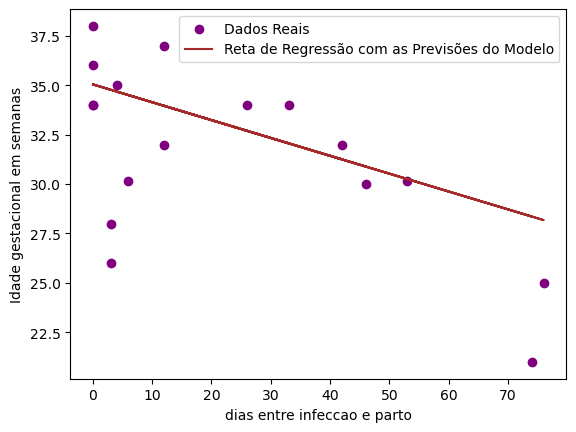

In [72]:
# Visualiza a reta de regressão linear (previsões) e os dados reais 
plt.scatter(X, y, color='purple', label = 'Dados Reais')
plt.plot(X,modelo.predict(X), color = 'brown', label = 'Reta de Regressão com as Previsões do Modelo')
plt.xlabel('dias entre infeccao e parto')
plt.ylabel('Idade gestacional em semanas')
plt.legend()
plt.show()

In [73]:
# Avalia o modelo nos dados de teste
score = modelo.score(X_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.02


Um coeficiente de determinação de 0.02 indica que o modelo de regressão não está desempenhando bem na explicação da variação na variável dependente com base nas variáveis independentes. Em outras palavras, o modelo não está conseguindo capturar ou prever adequadamente as relações entre as variáveis. Um dos motivos que pode explicar este valo baixo é tamanho da amostra pequeno, um tamanho de amostra pequeno em relação ao número de variáveis independentes pode levar a uma baixa capacidade de generalização do modelo. Neste caso, como não é possível coletar mais dados seria necessário explorar outras maneiras de melhorar ou ajustar seu modelo existente para obter o máximo de informações úteis possível a partir dos dados disponíveis. **Como a criação deste modelo é para treinamento de conhecimentos básicos, vamos prosseguir com esta situação.**

In [74]:
#Coeficiente linear
B0= modelo.intercept_
B0

35.04259121370067

In [75]:
#Coeficiente angular
B1=modelo.coef_
B1

array([-0.09038223])

## Deploy do Modelo

Usaremos o modelo para 'prever' a idade gestacional

In [76]:
# Define um novo valor 'dias entre infecção e o parto'
dias_infeccao = np.array([[17]]) 

# Faz previsão com o modelo treinado
idade_gestacional_prevista = modelo.predict(dias_infeccao)

idade_gestacional_prevista

array([33.50609332])

## Podemos usar Numpy também para realizar a manipulação dos dados. ##
Importaremos a biblioteca **'os'** que fornece uma interface para interagir com o sistema operacional, permitindo que seja realizado tarefas como gerenciar diretórios e arquivos. 

In [77]:
import os
dados_gestantes1 = os.path.join('dadosgestantes.csv')
!more dadosgestantes.csv

Paciente;Idade da gestante;Idade gestacional em semanas;dias entre infeccao e parto;Condicoes medicas
A;45;26;3;Pre eclampsia e diabetes mellitus gestacional
B;38;28;3;Hipotireoidismo pre gestacional
C;29;34;0;Diabetes mellitus gestacional, obesidade, hipotireoidismo, ex usuaria de substancia psicoativa e historico de sifilis devidamente tratada
D;37;34;0;Transtorno de ansiedade generalizada
E;23;36;0;Nao informado
F;28;25;76;Diabetes mellitus tipo 2
G;22;35;4;Diabetes mellitus gestacional, obesidade e hipotireoidismo
H;26;32;42;Toxoplasmose aguda e hipotireoidismo
I;22;34;33;Asma, transtorno de ansiedade generalizada e obesidade
J;32;38;0;Nao informado
K;30;30;46;Pre eclampsia e diabetes mellitus gestacional, obesidade e infeccao do trato urinario de repeticao
L;27;37;12;Diabetes mellitus gestacional
M;34;34;26;Nao informado
N;39;8;231;Nao informado
O;26;21;74;Diabetes mellitus gestacional, obesidade e hipotireoidismo
P;;;53;Nao informado
Q;;;6;Nao informado


Agora utilizaremos biblioteca **NumPy** para carregar dados do arquivo e armazená-los nas variáveis. O código abaixo é projetado para carregar dados numéricos de um arquivo CSV e não é adequado para lidar com valores vazios ou strings, neste caso vamos escolher apenas as colunas númericas: 1,2,3, excluindo a primeira coluna (0). E como o **np.loadtxt** não permite excluir linhas do arquivo diretamente durante a leitura, iremos inicialmente carregar os dados como strings. **usecols=**: Especifica quais colunas do arquivo CSV você deseja carregar. **skiprows=1:** Ignora a primeira linha do arquivo CSV. Isso é comum quando a primeira linha contém cabeçalhos ou rótulos de coluna.

In [78]:
dados_gestantes_strings = np.loadtxt(dados_gestantes1, dtype=str, delimiter=';', usecols=(1, 2, 3), skiprows=1)
dados_gestantes_strings

array([['45', '26', '3'],
       ['38', '28', '3'],
       ['29', '34', '0'],
       ['37', '34', '0'],
       ['23', '36', '0'],
       ['28', '25', '76'],
       ['22', '35', '4'],
       ['26', '32', '42'],
       ['22', '34', '33'],
       ['32', '38', '0'],
       ['30', '30', '46'],
       ['27', '37', '12'],
       ['34', '34', '26'],
       ['39', '8', '231'],
       ['26', '21', '74'],
       ['', '', '53'],
       ['', '', '6']], dtype='<U3')

In [79]:
#Excluindo as duas últimas linhas
dados_gestantes_array = dados_gestantes_strings[:-2, :]
dados_gestantes_array

array([['45', '26', '3'],
       ['38', '28', '3'],
       ['29', '34', '0'],
       ['37', '34', '0'],
       ['23', '36', '0'],
       ['28', '25', '76'],
       ['22', '35', '4'],
       ['26', '32', '42'],
       ['22', '34', '33'],
       ['32', '38', '0'],
       ['30', '30', '46'],
       ['27', '37', '12'],
       ['34', '34', '26'],
       ['39', '8', '231'],
       ['26', '21', '74']], dtype='<U3')

In [80]:
#Converte os valores de string em números inteiros
dados_gestantes_array = dados_gestantes_array.astype(int)
dados_gestantes_array

array([[ 45,  26,   3],
       [ 38,  28,   3],
       [ 29,  34,   0],
       [ 37,  34,   0],
       [ 23,  36,   0],
       [ 28,  25,  76],
       [ 22,  35,   4],
       [ 26,  32,  42],
       [ 22,  34,  33],
       [ 32,  38,   0],
       [ 30,  30,  46],
       [ 27,  37,  12],
       [ 34,  34,  26],
       [ 39,   8, 231],
       [ 26,  21,  74]])

Percebemos que dados_gestantes_array é uma matriz bidimensional, uma vez que possui linhas e colunas. 

In [81]:
#Armazenando cada coluna do array de dados em duas variáveis diferentes
#Coluna idade gestacional, segunda coluna:
var1 = dados_gestantes_array[:, 1] 
#Coluna dias entre infeccção e o parto, terceira coluna:
var2 = dados_gestantes_array[:, 2]  

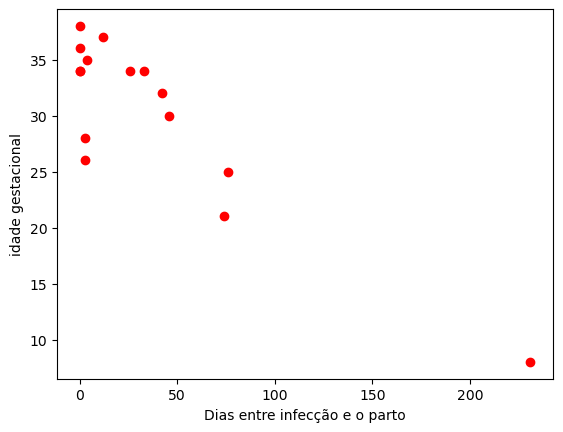

In [82]:
#PLotando um gráfico de dispersão em que var2 representa o eixo x e var1 o eixo y.
plt.plot(var2, var1, 'o', markersize=6, color='red')
plt.xlabel('Dias entre infecção e o parto')
plt.ylabel('idade gestacional')
plt.show()

### O objetivo agora é criar um banco de dados PostgreSQL para aplicar a linguagem SQL na sintaxe do pandas com linguagem Python

In [83]:
# importando a biblioteca psycopg2, biblioteca Python para trabalhar com o banco de dados PostgreSQL.
import psycopg2 as ps

In [84]:
# Credenciais do banco de dados
db_host = 'gestantes.czkoekqounhz.us-east-1.rds.amazonaws.com' #endereço onde o banco de dados PostgreSQL está hospedado
db_port = '5432' #porta usada para se conectar ao banco de dados PostgreSQL
db_name = 'gestantes1' #nome do banco de dados PostgreSQL
db_user = 'postgres'  #nome de usuário usado para autenticar a conexão com o banco de dados
db_password = '4960so49' #senha associada ao nome de usuário fornecido

# Conectando-se ao banco de dados e atrbuindo a conexão a variável 'conn'
# Armazenar a conexão em uma variável facilita o uso subsequente da conexão para executar consultas e outras operações 
#no banco de dados.
try:
    conn = ps.connect(
        host=db_host,
        port=db_port,
        database=db_name,
        user=db_user,
        password=db_password
    )
    print("Conexão ao PostgreSQL bem-sucedida")
except ps.Error as e:
    print("Erro ao conectar ao PostgreSQL:", e)


Conexão ao PostgreSQL bem-sucedida


Quando você chama **con.cursor()**, você está criando um objeto de cursor que está vinculado à conexão conn. Esse objeto de cursor age como uma espécie de "ponte" entre o seu código Python e o banco de dados. Portanto, a variável **cursor** é criada para permitir a interação com o banco de dados por meio de consultas SQL em Python

In [85]:
# Abre um cursor para percorrer os dados no banco de dados
cursor = conn.cursor()

**query** é uma variável que **armazena uma consulta SQL**. A consulta SQL em questão é uma instrução SELECT que solicita todas as colunas (*) da tabela chamada 'tabela_gestantes'

In [86]:
query = 'SELECT * FROM tabela_gestantes'

Ao executarmos o código **cursor.execute(query**) abaixo, estaremos executando a consulta e buscando os registros da tabela especificada. Há probabilidade de executar a consulta SQL diretamente usando **cursor.execute('SELECT * FROM tabela_gestantes')** sem armazená-la em uma variável, mas isto não é bom uso,quando pensamos na questão de reutilização de código.

In [87]:
cursor.execute(query)

Portanto, quando chamamos o **cursor.execute('SELECT * FROM tabela_gestantes')**, você está efetuando uma consulta SQL que seleciona todos os registros da tabela em questão. Após essa execução bem-sucedida, o objeto de cursor mantém o resultado da consulta em sua memória. Em seguida, quando chamamos o **cursor.fetchall()**, você está instruindo o cursor a recuperar todos os resultados da consulta que foi executada anteriormente. Os resultados recuperados são então armazenados agora **na variável dados**. Assim, ao executar o  **cursor.fetchall()**, o cursor recupera todos os resultados da consulta SQL que foi executada anteriormente e os armazena em uma lista (ou em uma sequência de tuplas, dependendo do banco de dados e da biblioteca que você está usando).

In [88]:
dados = cursor.fetchall()

In [89]:
dados

[('A', 45, 26, 3, 'Pre eclampsia e diabetes mellitus gestacional'),
 ('B', 38, 28, 3, 'Hipotireoidismo pre gestacional'),
 ('C',
  29,
  34,
  0,
  'Diabetes mellitus gestacional, obesidade, hipotireoidismo, ex usuaria de substancia psicoativa e historico de sifilis devidamente tratada'),
 ('D', 37, 34, 0, 'Transtorno de ansiedade generalizada'),
 ('E', 23, 36, 0, 'Nao informado'),
 ('F', 28, 25, 76, 'Diabetes mellitus tipo 2'),
 ('G',
  22,
  35,
  4,
  'Diabetes mellitus gestacional, obesidade e hipotireoidismo'),
 ('H', 26, 32, 42, 'Toxoplasmose aguda e hipotireoidismo'),
 ('I', 22, 34, 33, 'Asma, transtorno de ansiedade generalizada e obesidade'),
 ('J', 32, 38, 0, 'Nao informado'),
 ('K',
  30,
  30,
  46,
  'Pre eclampsia e diabetes mellitus gestacional, obesidade e infeccao do trato urinario de repeticao'),
 ('L', 27, 37, 12, 'Diabetes mellitus gestacional'),
 ('M', 34, 34, 26, 'Nao informado'),
 ('N', 39, 8, 231, 'Nao informado'),
 ('O',
  26,
  21,
  74,
  'Diabetes mellitus g

In [90]:
# Carrega os dados como dataframe do Pandas
tabela_gestantes = pd.DataFrame(dados, columns = ['Paciente', 
                                    'Idade_gestante', 
                                    'Idade_gestacional',
                                    'Dias_entre_infeccao_parto',
                                    'Condicoes_medicas'])

Eu preciso adicionar o nome das colunas porque os metadados geralmente não são retornados automaticamente em uma consulta SELECT em um banco de dados. Quando você executa uma consulta SELECT, o banco de dados normalmente retorna apenas os dados das colunas especificadas na consulta. Os metadados, como informações sobre a estrutura da tabela (nomes das colunas, tipos de dados, restrições, chaves primárias, etc.), não são incluídos nos resultados da consulta por padrão.

In [91]:
tabela_gestantes

,Paciente,Idade_gestante,Idade_gestacional,Dias_entre_infeccao_parto,Condicoes_medicas
0,A,45.0,26.0,3,Pre eclampsia e diabetes mellitus gestacional
1,B,38.0,28.0,3,Hipotireoidismo pre gestacional
2,C,29.0,34.0,0,"Diabetes mellitus gestacional, obesidade, hipo..."
3,D,37.0,34.0,0,Transtorno de ansiedade generalizada
4,E,23.0,36.0,0,Nao informado
5,F,28.0,25.0,76,Diabetes mellitus tipo 2
6,G,22.0,35.0,4,"Diabetes mellitus gestacional, obesidade e hip..."
7,H,26.0,32.0,42,Toxoplasmose aguda e hipotireoidismo
8,I,22.0,34.0,33,"Asma, transtorno de ansiedade generalizada e o..."
9,J,32.0,38.0,0,Nao informado


### Agora podemos realizar uma variedade de operações de manipulação de dados, análise, visualização, agregação, etc., usando as funcionalidades oferecidas pelo Pandas.

In [92]:
tabela_gestantes['Condicoes_medicas'] = tabela_gestantes['Condicoes_medicas'].str.replace('Nao informado', 'Sem dados')

In [93]:
tabela_gestantes

,Paciente,Idade_gestante,Idade_gestacional,Dias_entre_infeccao_parto,Condicoes_medicas
0,A,45.0,26.0,3,Pre eclampsia e diabetes mellitus gestacional
1,B,38.0,28.0,3,Hipotireoidismo pre gestacional
2,C,29.0,34.0,0,"Diabetes mellitus gestacional, obesidade, hipo..."
3,D,37.0,34.0,0,Transtorno de ansiedade generalizada
4,E,23.0,36.0,0,Sem dados
5,F,28.0,25.0,76,Diabetes mellitus tipo 2
6,G,22.0,35.0,4,"Diabetes mellitus gestacional, obesidade e hip..."
7,H,26.0,32.0,42,Toxoplasmose aguda e hipotireoidismo
8,I,22.0,34.0,33,"Asma, transtorno de ansiedade generalizada e o..."
9,J,32.0,38.0,0,Sem dados


In [94]:
# Fecha o cursor e encerra a conexão
cursor.close()
conn.close()